### Full Name : Alireza Habibzadeh
### Student Number : 99109393
___

## P1: Introduction (5 points)
The dataset comprises various independent variables serving as predictors for loan results and one dependent variable, "Loan_Status." The independent variables include Gender, Marital status, Dependents, and so on. Initially, we conduct data exploration to understand the dataset better. Then, we do some data preprocessing to ready the data for the regression model. Finally, we train a regression model to predict the outcome.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The cell below will download the dataset.

In [120]:
!gdown 1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM

Downloading...
From: https://drive.google.com/uc?id=1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM
To: /content/Loan_Data.csv
100% 38.0k/38.0k [00:00<00:00, 66.8MB/s]


TODO: Load the dataset as a dataframe. Check for duplicate rows and if there are any, delete them. Display the first 10 rows. (5 points)

In [121]:
df = pd.read_csv('/content/Loan_Data.csv')

# Print number of duplicate rows (= 2 * extra rows)
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

df.head(10)

Number of duplicate rows: 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## P2: Data Exploration (18 points)
In this section, we perform some data exploration to get a better understanding of the data.

TODO: Display the count of each unique value in the 'property_area' column. (3 points)

In [122]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

TODO: Plot the correlation between different features. (use sns.heatmap) (3 points)

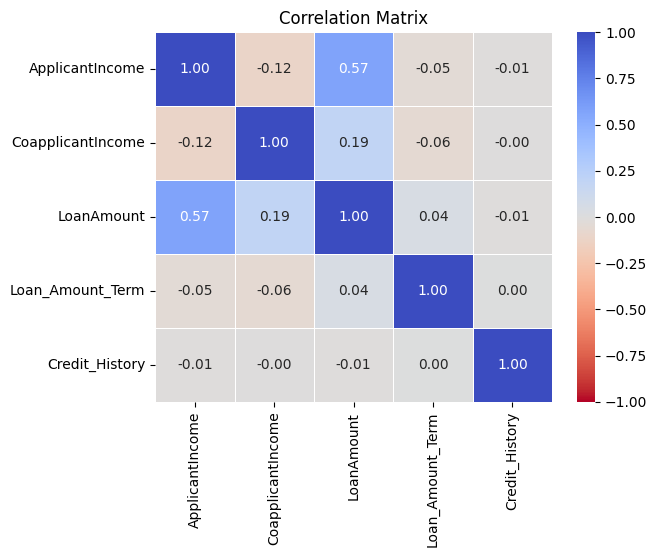

In [123]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

TODO: Plot a bar chart combining the 'Gender' and 'Loan_Status' columns (hint: use crosstab in pandas). Additionally, plot count plots for the 'Married' and 'Self_Employed' columns. (3 points)

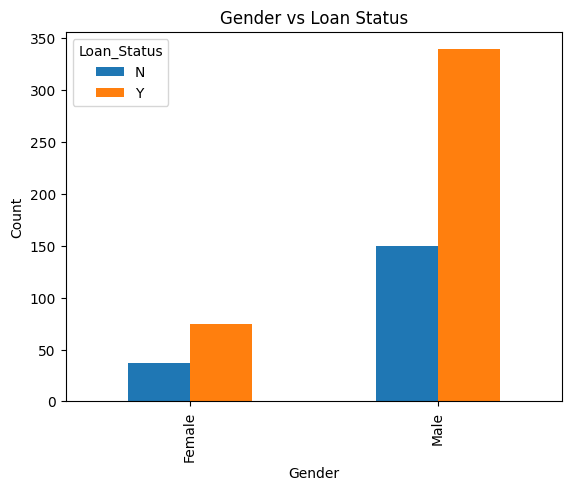

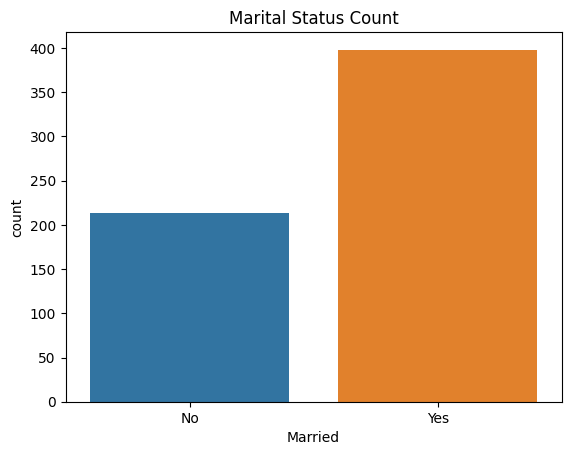

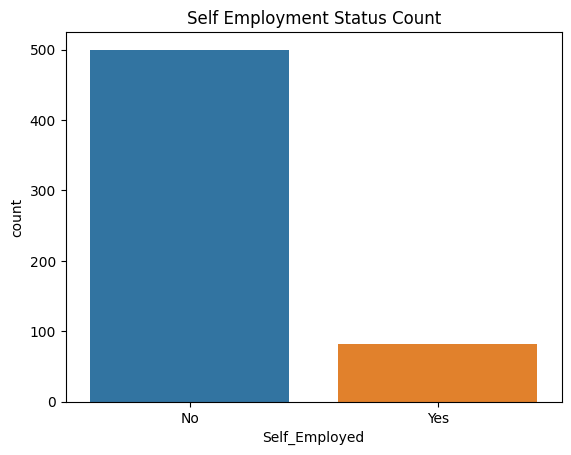

In [124]:
# Bar chart
gender_status_ct = pd.crosstab(df['Gender'], df['Loan_Status'])
gender_status_ct.plot(kind='bar')
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count plots
sns.countplot(x='Married', data=df)
plt.title('Marital Status Count')
plt.show()

sns.countplot(x='Self_Employed', data=df)
plt.title('Self Employment Status Count')
plt.show()

TODO: Plot a pie chart for the 'Education' column. (3 points)

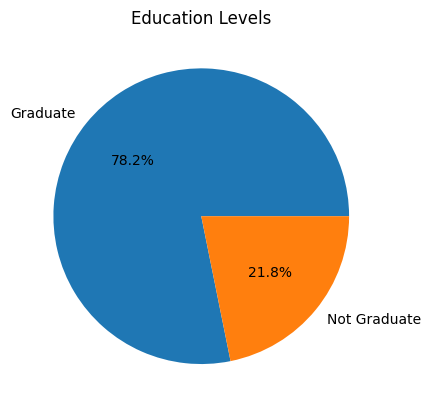

In [125]:
education_counts = df['Education'].value_counts()

plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Education Levels')
plt.show()

TODO: Plot a box plot for the combination of 'Loan_Status' and 'ApplicantIncome' columns. (3 points)

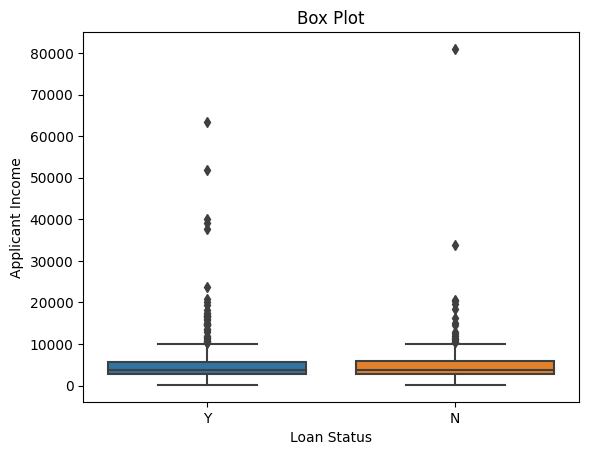

In [126]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Box Plot')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

TODO: Plot a histogram of the 'ApplicantIncome' column with 10 bins. (3 points)

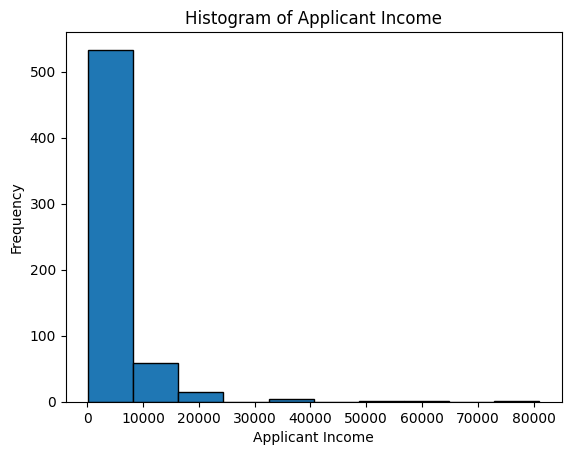

In [127]:
plt.hist(df['ApplicantIncome'], bins=10, edgecolor='black')
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

## P3: Pre-processing (20 points)
In this section, we perform some pre-processing to make the data ready for the model.

TODO: Check for any null value. (2 point)

In [128]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

TODO: As you can observe, there are some null values. Given the significance of credit history for loan status prediction, we cannot impute null values for this specific column. Therefore, delete all rows containing null values in the 'credit history' column. For other columns, fill null entries with the mode for non-float/int columns and with the mean for float/int columns. (8 points)

In [129]:
# We should not use the new dataframe with null Credit_History dropped rows to
# calculate mean and mode since some non-null values are ommited
df_clean = df.copy()
df_clean.dropna(subset=['Credit_History'], inplace=True)

# Fill null values in other columns
for column in df_clean.columns:
    if df_clean[column].dtype == 'object':
        # non-float/int
        #                       Note that here df is used to calculate the mode
        df_clean[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # float/int
        df_clean[column].fillna(df[column].mean(), inplace=True)

# Verify that there are no nulls
print("Remaining null values:")
print(df_clean.isnull().sum())

Remaining null values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


TODO: There are some columns that are entirely independent of our dependent variable, such as Loan_ID. Please drop this column. (2 points)

In [130]:
df_clean.drop('Loan_ID', axis=1, inplace=True)
# قائدتا اینجا باید
# Gender
# هم دراپ می‌کردیم
# اگر رگرسیون بزنیم و ضریب آن مثبت یا منفی زیادی شود دو کاندید وام با شرایط برابر را با تبعیض جنسیتی انتخاب خواهیم کرد :)

TODO: Separate the data into independent variables and the target variable. (1 point)

In [140]:
X = df_clean.drop('Loan_Status', axis=1)
y = df_clean['Loan_Status']

TODO: Use LabelEncoder to transform categorical variables into numeric variables. (3 points)

In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

y = label_encoder.fit_transform(y)

TODO: Use StandardScaler for independant variables. (3 points)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467057,-1.354316,-0.739264,-0.522626,-0.391630,0.061056,-0.619733,0.015605,0.280141,0.432861,1.237382
1,0.467057,0.738380,0.244097,-0.522626,-0.391630,-0.140994,-0.009090,-0.209844,0.280141,0.432861,-1.314295
2,0.467057,0.738380,-0.739264,-0.522626,2.553429,-0.393636,-0.619733,-0.969007,0.280141,0.432861,1.237382
3,0.467057,0.738380,-0.739264,1.913415,-0.391630,-0.460188,0.335105,-0.307800,0.280141,0.432861,1.237382
4,0.467057,-1.354316,-0.739264,-0.522626,-0.391630,0.085155,-0.619733,-0.050664,0.280141,0.432861,1.237382


TODO: Divide data to train and test. (1 point)

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_test.head() # "Data snooping" is that you?

Shapes:
X_train: (507, 11)
X_test: (57, 11)
y_train: (507,)
y_test: (57,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
430,0.467057,0.738380,-0.739264,-0.522626,-0.391630,1.791566,-0.619733,-0.430246,0.280141,0.432861,-0.038456
140,0.467057,-1.354316,-0.739264,-0.522626,-0.391630,0.590439,-0.619733,1.210527,0.280141,0.432861,1.237382
440,0.467057,0.738380,0.244097,-0.522626,2.553429,1.787576,0.291372,-0.724116,0.280141,0.432861,-0.038456
560,0.467057,0.738380,2.210818,-0.522626,-0.391630,-0.217122,-0.619733,-1.287366,-2.544645,0.432861,-1.314295
514,-2.141065,0.738380,0.244097,-0.522626,2.553429,2.237161,-0.619733,5.569596,0.280141,0.432861,-0.038456


## P3: SKLearn Regression Model (10 points)

In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn` (6 points). Then use `sklearn`'s confusion matrix to check the result. (4 points)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy Score:", accuracy)

# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 8  9]
 [ 1 39]]

Accuracy Score: 0.8245614035087719

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.81      0.97      0.89        40

    accuracy                           0.82        57
   macro avg       0.85      0.72      0.75        57
weighted avg       0.84      0.82      0.81        57



## P4: Custom Regression Model (32 points)

TODO: Imeplement the Logistic Regression model. Complete these methods: `loss`, `loss_derivative`, `predict` and for loop of fit function. (27 points)

In [155]:
class GDLogisticRegression:
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        y_pred = self.sigmoid(np.dot(X, self.beta))
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def loss_derivative(self, X, y):
        y_pred = self.sigmoid(np.dot(X, self.beta))
        return np.dot(X.T, (y_pred - y)) / len(y)

    def predict(self, X_test, threshold=0.5):
        X_test_new = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
        y_pred_prob = self.sigmoid(np.dot(X_test_new, self.beta))
        y_pred = (y_pred_prob >= threshold).astype(int)
        return y_pred

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            gradient = self.loss_derivative(X_train_new, y_train)
            momentum = self.momentum * momentum - self.lr * gradient

            # Update the parameters
            self.beta += momentum

            current_loss = self.loss(X_train_new, y_train)

            if abs(current_loss - last_loss) < self.tol:
                break

            last_loss = current_loss

TODO: Predict the "Outcome" for the testing samples. (5 points)

In [159]:
logistic_model = GDLogisticRegression(n_features=X_train.shape[1])
logistic_model.fit(X_train, y_train)

y_pred_custom = logistic_model.predict(X_test)

print("Predicted outcome for testing samples:")
print(y_pred_custom)

Predicted outcome for testing samples:
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]


# P5: Evaluation (15 points)

TODO: Calculate `precision`, `recall`, and `f1-score macro` using your own code. (Search what f1-score and recall are) **(each part 5 points)**

In [162]:
def precision(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))

    return true_positive / (true_positive + false_positive)

def recall(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    return true_positive / (true_positive + false_negative)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)

    return 2 * prec * rec / (prec + rec)


print("Precision:", precision(y_test, y_pred_custom))
print("Recall:", recall(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))

Precision: 0.8125
Recall: 0.975
F1-Score: 0.8863636363636362
